## 디비스캔
  - 밀도기반 군집 알고리즘
  - 입실론 반경과 최소 포인트를 매개변수로 사용하여 군집을 정의
  - 노이즈(이상치)를 자동으로 분류
  

*----dbscan 결과 -----*
labels : [ 0  0  0  0  1  1  1  1 -1]


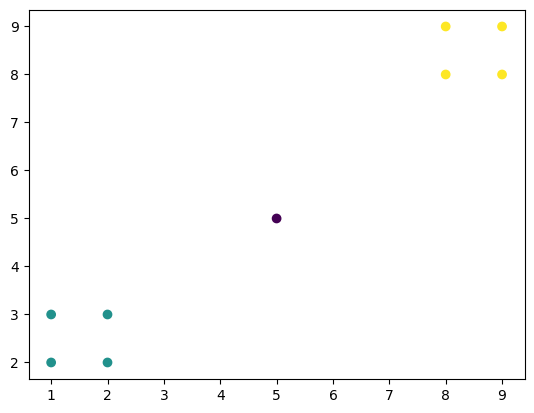

In [2]:
import numpy as np

x = np.array([
  [1,2],[1,3],[2,2],[2,3]
  ,[8,8],[8,9],[9,8],[9,9]
  ,[5,5]
])

# 모델
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=3)

# eps 반경 (이웃을 찾을 거리)
#한점을 중심으로 해당거리안에 있는 점들을 이웃으로 간주!
# 기본 가이드라인 (참고)
# 2d 저차원 : 0.3~1.0
# 5~10차원까지는 1.0~5.0 
#=>데이터 분포와 스케일에 따라 달라짐!

# min_samples : 핵심점 판단을 위한 최소 포인트 수
# 한 점이 핵심점이 되려면 주변 eps반경안에 min_samples 이상의 점이 있어야함.

labels =dbscan.fit_predict(x)
print('*----dbscan 결과 -----*')
print(f'labels : {labels}')

# 군집종류중 -1을 노이즈를 의미함

import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=labels)



*----dbscan 결과 -----*
labels : [0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1]


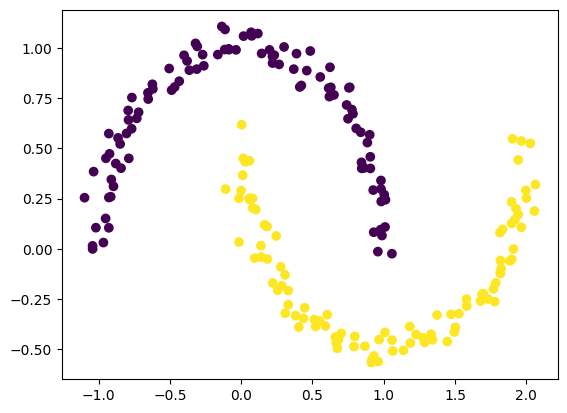

In [ ]:
# 가상 데이터셋 사용
from sklearn.datasets import make_moons  # 반달모양의 비선형 군집데이터 생성

x,y = make_moons(n_samples=200, noise=0.05, random_state=42)

#n_samples: 데이터수(포인트 개수)
# nois : 노이즈 추가.
# => k-means 알고리즘은 분류하기 어려움. 그래서 DB스캔을 사용함.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
# 모델학습 진행 -> 반경 0.3, 최소 데이터수 5개

#학습시키고 
labels =dbscan.fit_predict(x)
print('*----dbscan 결과 -----*')
print(f'labels : {labels}')
# 결과 추출










# 노이즈 제외 군집수 계산

import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=labels)


In [ ]:
from sklearn.datasets import load_wine

# 데이터 로드

wine = load_wine(as_frame = True)

# df = wine.frame
# df

x= wine.data
y= wine.target


# 통계 요약 정보 확인
x.describe().loc[['min','max']]

# => feature 간의 범위가 10배이상 나는 경우 스케일링 작업을 해주는것이 좋음.

# color_intensity 범위 12정도, proline 범위가 1400 정도 이 두개의 차이가 100배 차이남
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
x_s =scaler.fit_transform(x)

model =DBSCAN(eps=1.2, min_samples=3)

labels=model.fit_predict(x_s)


labels
#모두 -1 이라는 건 어떤 점도 핵심포인트가 되지 못했음.
# 즉 주어진 eps 반경 안에 min_samples 이상의 이웃이 존재하지 않았다는 뜻
# 적절한 eps 값을 설정해 줘야함. k-distance 플롯을 활용하여 적절한 eps 후보를 찾아야함





array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

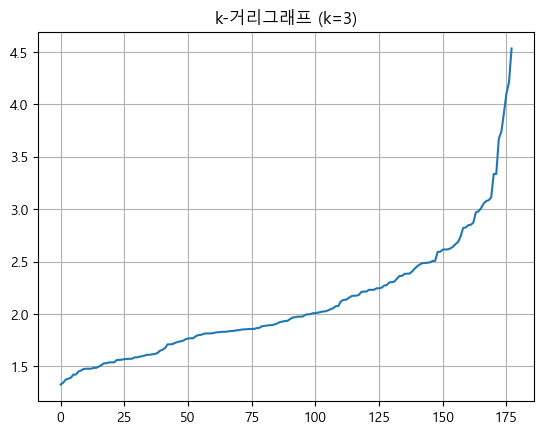

In [18]:
min_samples = 3

# 최근접이웃계산방식 사용
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(x_s)

# 거리정보와 인덱스정보조회
distances, indices =nbrs.kneighbors(x_s)

# 거리는 : 각 샘플별 이웃까지의 거리
# indices : 각 샘플별 이웃 인덱스

distances

k_distances=np.sort(distances[:,-1])

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus']= False

plt.plot(k_distances)

plt.title(f'k-거리그래프 (k={min_samples})')
plt.grid(True)


In [ ]:
model = DBSCAN(eps=3.9, min_samples=3)
labels = model.fit_predict(x_s)
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

발견한 군집수 : 2


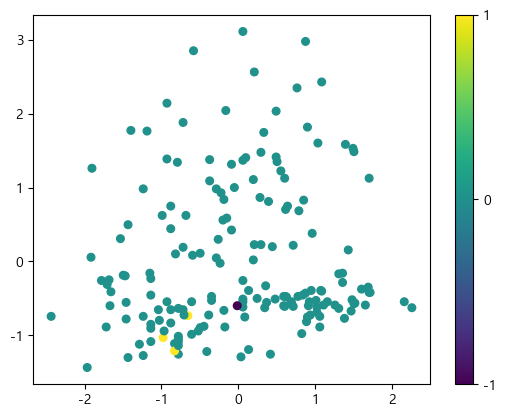

In [25]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'발견한 군집수 : {n_clusters}')

#시각화 

sct = plt.scatter(x_s[:,0], x_s[:,1], c=labels, s= 30)

plt.colorbar(sct, ticks=list(set(labels)))